# Analysis of Covid-19 NYC data
Looking at waves.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

NEW_COVID_CASE_COUNT  PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                                              
2020-02-29                           1                    0   
2020-03-01                           0                    0   
2020-03-02                           0                    0   
2020-03-03                           1                    0   
2020-03-04                           5                    0   

                  HOSPITALIZED_COUNT  DEATH_COUNT  PROBABLE_DEATH_COUNT  \
DATE_OF_INTEREST                                                          
2020-02-29                         1            0                     0   
2020-03-01                         1            0                     0   
2020-03-02                         2            0                     0   
2020-03-03                         7            0                     0   
2020-03-04                         2            0                     0   

                  CASE_COUNT_7DAY_AVG  ALL_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                 
2020-02-29                          0                        0   
2020-03-01                          0                        0   
2020-03-02                          0                        0   
2020-03-03                          0                        0   
2020-03-04                          0                        0   

                  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                              
2020-02-29                          0                     0   
2020-03-01                          0                     0   
2020-03-02                          0                     0   
2020-03-03                          0                     0   
2020-03-04                          0                     0   

                  ALL_DEATH_COUNT_7DAY_AVG  ...  SI_PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                            ...                           
2020-02-29                               0  ...                       0   
2020-03-01                               0  ...                       0   
2020-03-02                               0  ...                       0   
2020-03-03                               0  ...                       0   
2020-03-04                               0  ...                       0   

                  SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  \
DATE_OF_INTEREST                                          
2020-02-29                            0               0   
2020-03-01                            0               0   
2020-03-02                            0               0   
2020-03-03                            0               0   
2020-03-04                            0               0   

                  SI_PROBABLE_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                    
2020-02-29                              0                       0   
2020-03-01                              0                       0   
2020-03-02                              0                       0   
2020-03-03                              0                       0   
2020-03-04                              0                       0   

                  SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                               
2020-02-29                                 0                               0   
2020-03-01                                 0                               0   
2020-03-02                                 0                               0   
2020-03-03                                 0                               0   
2020-03-04                                 0                               0   

                  SI_DEATH_COUNT_7DAY_AVG  SI_ALL_DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                         
2020-02-29  

# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

In [5]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

## Full history
Note that the 7 day rolling average clearly shows the trends

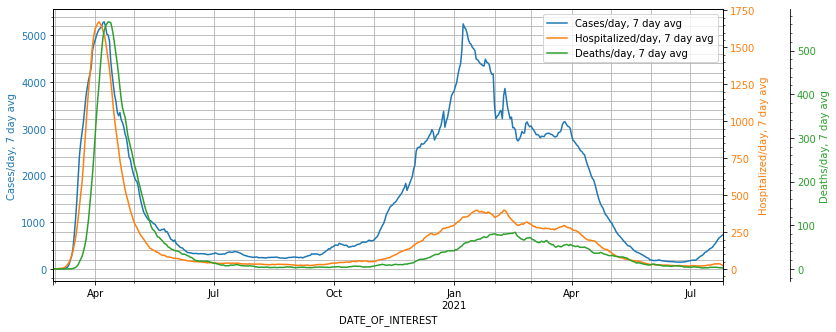

In [6]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                  "Hospitalized/day, 7 day avg",
                  "Deaths/day, 7 day avg"]],
             figsize=(12, 5))

## First wave

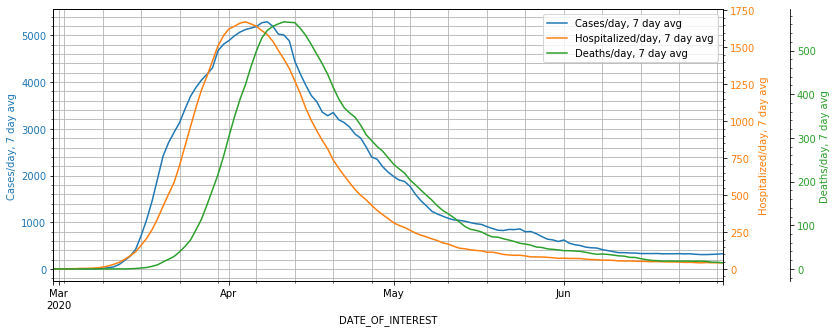

In [7]:
end = "2020-07-01"
period = dat[dat.index < end]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave

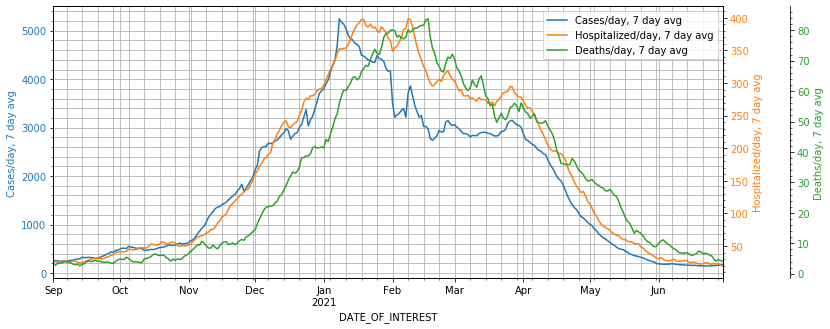

In [8]:
start = "2020-09-01"
end = "2021-07-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Third wave

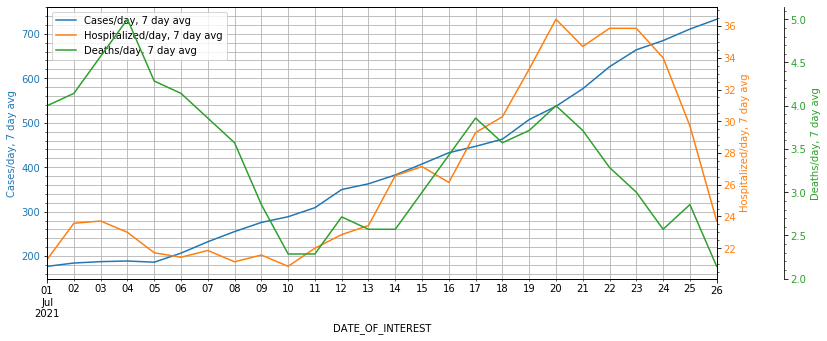

In [9]:
start = "2021-07-01"
period = dat[(dat.index >= start)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Peak analysis

## First wave
Oddly, cases/day peaked after hospitalized/day.  Cases/day peak is 4 days *after* hospitalized/day peak.  Deaths/day peak is 3 days later.

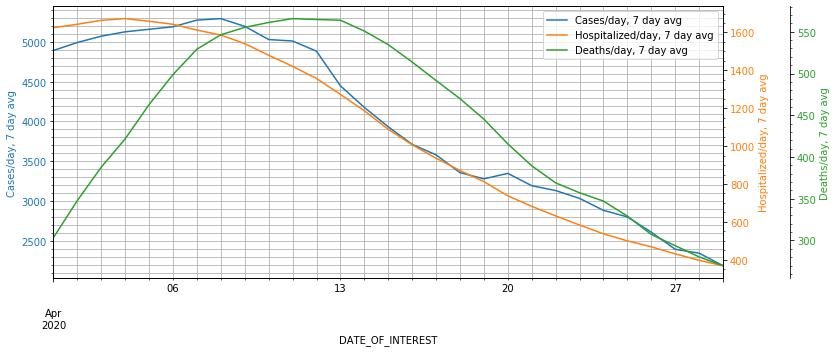

In [10]:
start = "2020-04-01"
end = "2020-04-30"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave
Delays are different.  Peak hospitalized/day is 10 days after peak cases/day.  Peak deaths/day is ~Feb 16, vs Jan 8, about 39 days. 

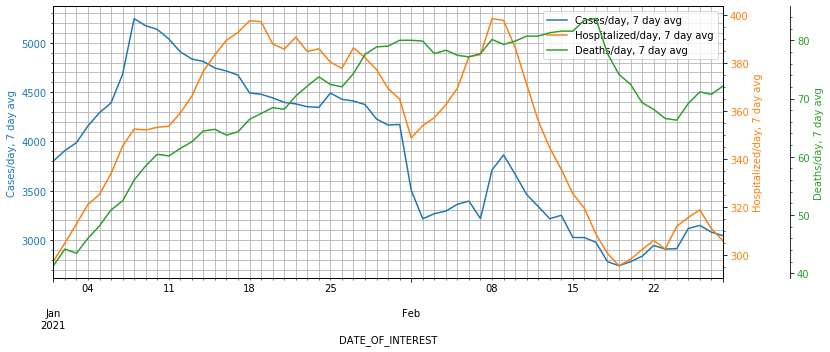

In [11]:
start = "2021-01-01"
end = "2021-03-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Rates
Looking at rates per case, but with shifts to account for delays

In [12]:
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"]

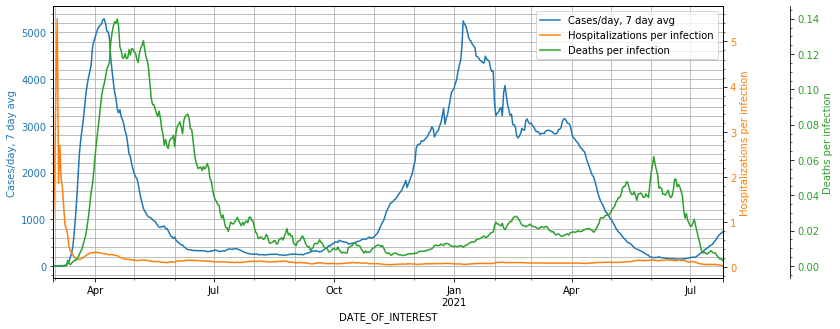

In [13]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

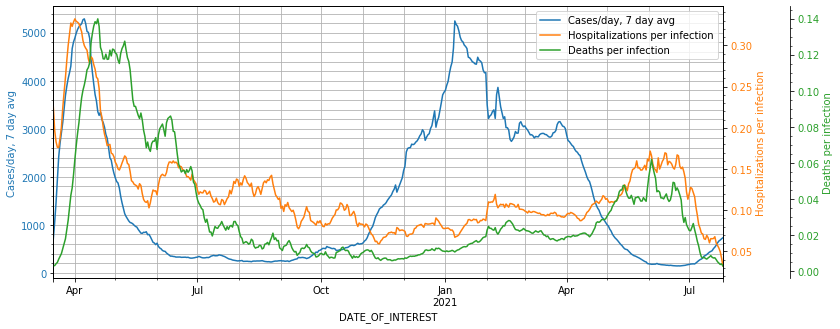

In [14]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 7 day shift

In [15]:
shift = 7
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

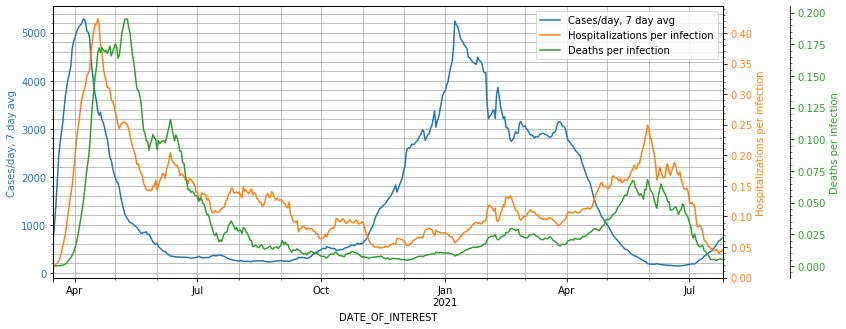

In [16]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 14 day shift

In [17]:
shift = 14
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

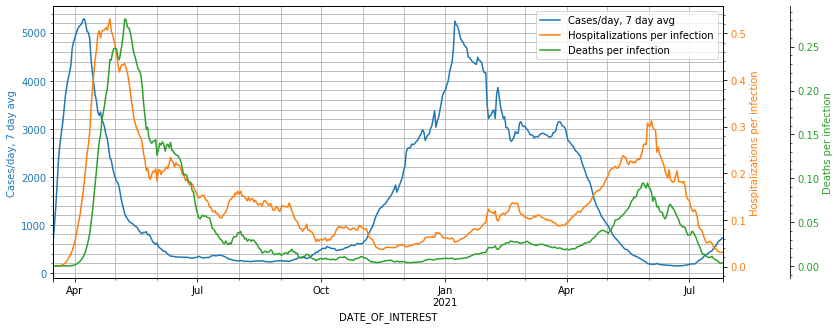

In [18]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## Lots of shifts

Rates shifted by -30 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      468.000000   
mean            1600.013769                        0.110526   
std             1500.688201                        0.098361   
min              145.285714                        0.028882   
25%              324.821429                        0.063364   
50%              816.000000                        0.098458   
75%             2877.535714                        0.133188   
max             5290.285714                        1.525020   

       Deaths per infection  
count            468.000000  
mean               0.024180  
std                0.046310  
min                0.008395  
25%                0.014758  
50%                0.018482  
75%                0.022038  
max                0.748999

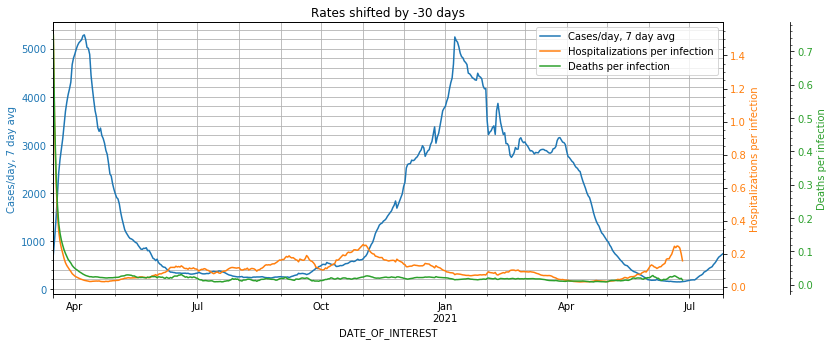

Rates shifted by -29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      469.000000   
mean            1600.013769                        0.111230   
std             1500.688201                        0.104286   
min              145.285714                        0.030181   
25%              324.821429                        0.063821   
50%              816.000000                        0.098757   
75%             2877.535714                        0.131484   
max             5290.285714                        1.662730   

       Deaths per infection  
count            469.000000  
mean               0.024654  
std                0.048070  
min                0.008745  
25%                0.014822  
50%                0.018599  
75%                0.022068  
max                0.771817

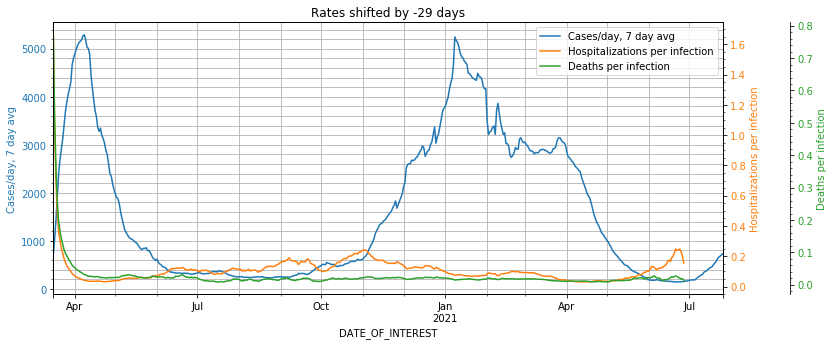

Rates shifted by -28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      470.000000   
mean            1600.013769                        0.112008   
std             1500.688201                        0.110391   
min              145.285714                        0.031396   
25%              324.821429                        0.066431   
50%              816.000000                        0.098844   
75%             2877.535714                        0.132014   
max             5290.285714                        1.783627   

       Deaths per infection  
count            470.000000  
mean               0.025129  
std                0.049584  
min                0.008720  
25%                0.014965  
50%                0.018546  
75%                0.022474  
max                0.790032

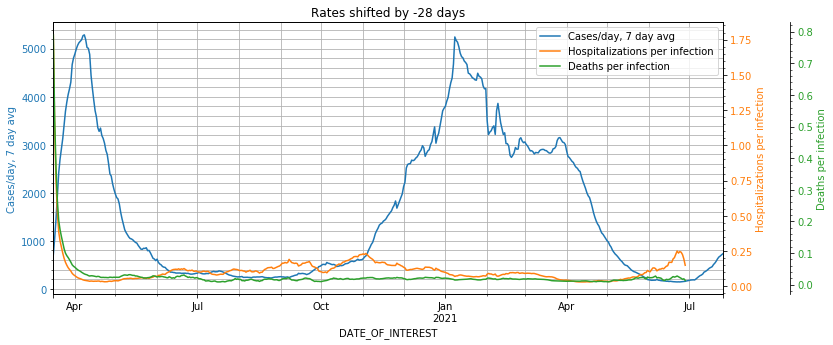

Rates shifted by -27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      471.000000   
mean            1600.013769                        0.112834   
std             1500.688201                        0.116600   
min              145.285714                        0.031981   
25%              324.821429                        0.067453   
50%              816.000000                        0.098938   
75%             2877.535714                        0.130617   
max             5290.285714                        1.901121   

       Deaths per infection  
count            471.000000  
mean               0.025573  
std                0.050438  
min                0.008365  
25%                0.015055  
50%                0.018477  
75%                0.022684  
max                0.791233

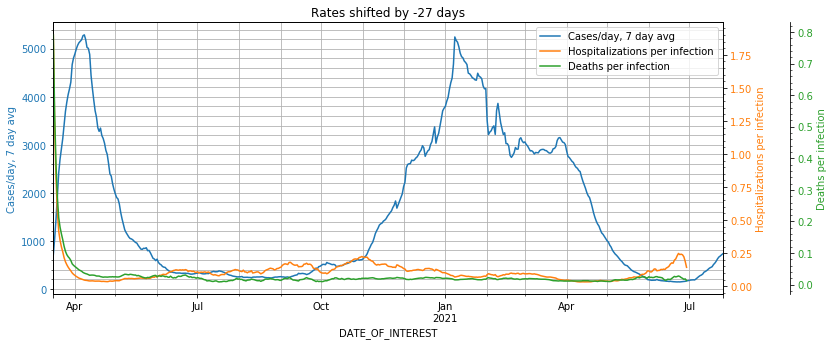

Rates shifted by -26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      472.000000   
mean            1600.013769                        0.113653   
std             1500.688201                        0.122070   
min              145.285714                        0.032975   
25%              324.821429                        0.068324   
50%              816.000000                        0.098265   
75%             2877.535714                        0.129509   
max             5290.285714                        1.991193   

       Deaths per infection  
count            472.000000  
mean               0.025999  
std                0.051012  
min                0.008504  
25%                0.015340  
50%                0.018487  
75%                0.022936  
max                0.792634

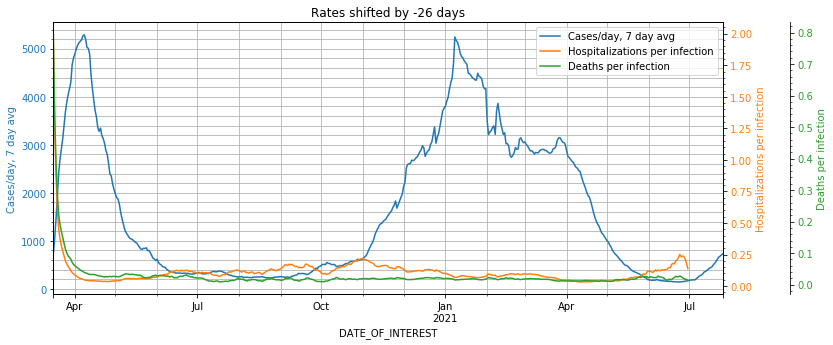

Rates shifted by -25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      473.000000   
mean            1600.013769                        0.114474   
std             1500.688201                        0.127054   
min              145.285714                        0.034319   
25%              324.821429                        0.069026   
50%              816.000000                        0.098837   
75%             2877.535714                        0.128139   
max             5290.285714                        2.073259   

       Deaths per infection  
count            473.000000  
mean               0.026403  
std                0.051206  
min                0.008661  
25%                0.015426  
50%                0.018203  
75%                0.023240  
max                0.786229

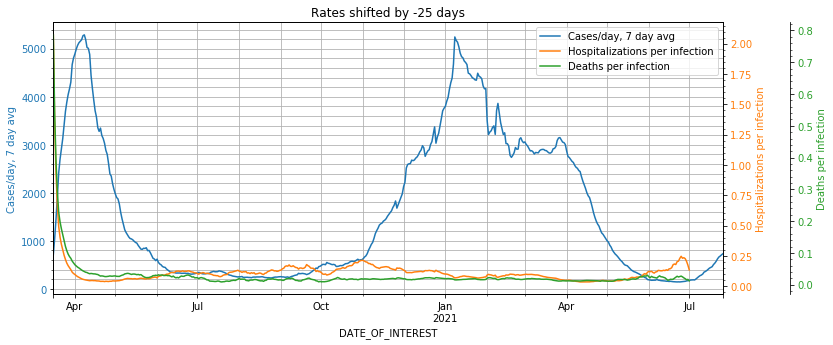

Rates shifted by -24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      474.000000   
mean            1600.013769                        0.115312   
std             1500.688201                        0.132003   
min              145.285714                        0.035862   
25%              324.821429                        0.069384   
50%              816.000000                        0.100251   
75%             2877.535714                        0.128439   
max             5290.285714                        2.158927   

       Deaths per infection  
count            474.000000  
mean               0.026791  
std                0.051169  
min                0.008664  
25%                0.015461  
50%                0.017972  
75%                0.023756  
max                0.778022

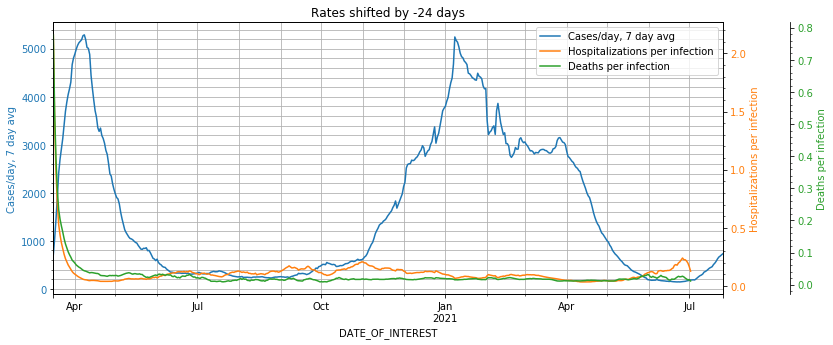

Rates shifted by -23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      475.000000   
mean            1600.013769                        0.116146   
std             1500.688201                        0.136267   
min              145.285714                        0.037083   
25%              324.821429                        0.070505   
50%              816.000000                        0.101149   
75%             2877.535714                        0.128687   
max             5290.285714                        2.222378   

       Deaths per infection  
count            475.000000  
mean               0.027162  
std                0.050888  
min                0.008435  
25%                0.015372  
50%                0.017957  
75%                0.023674  
max                0.765612

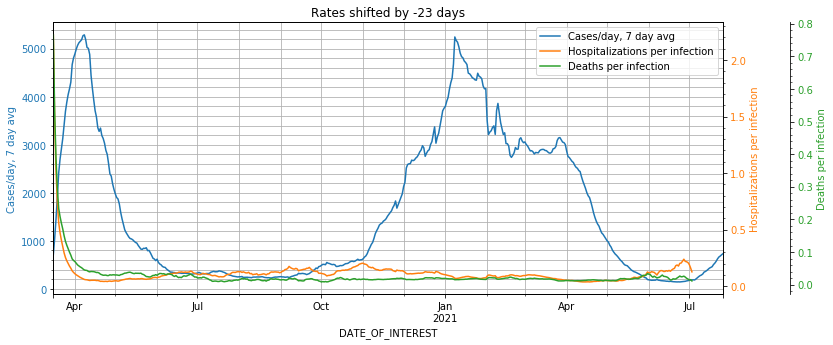

Rates shifted by -22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      476.000000   
mean            1600.013769                        0.116935   
std             1500.688201                        0.139418   
min              145.285714                        0.038477   
25%              324.821429                        0.071250   
50%              816.000000                        0.100923   
75%             2877.535714                        0.127756   
max             5290.285714                        2.259608   

       Deaths per infection  
count            476.000000  
mean               0.027498  
std                0.050131  
min                0.008105  
25%                0.015200  
50%                0.017905  
75%                0.024208  
max                0.741393

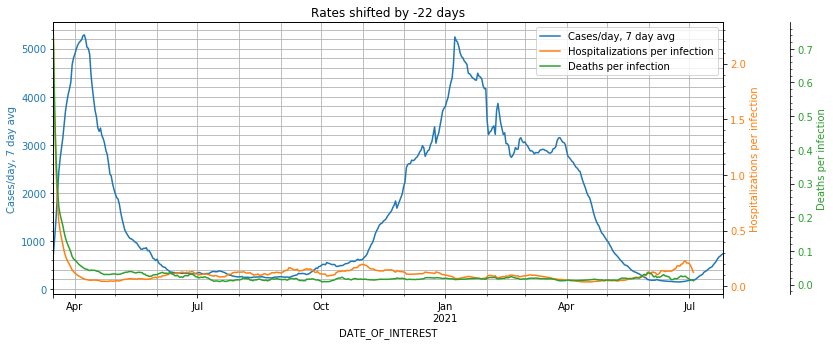

Rates shifted by -21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      477.000000   
mean            1600.013769                        0.117723   
std             1500.688201                        0.142278   
min              145.285714                        0.040046   
25%              324.821429                        0.072138   
50%              816.000000                        0.102758   
75%             2877.535714                        0.126939   
max             5290.285714                        2.302242   

       Deaths per infection  
count            477.000000  
mean               0.027773  
std                0.048614  
min                0.008037  
25%                0.015166  
50%                0.017841  
75%                0.024148  
max                0.698759

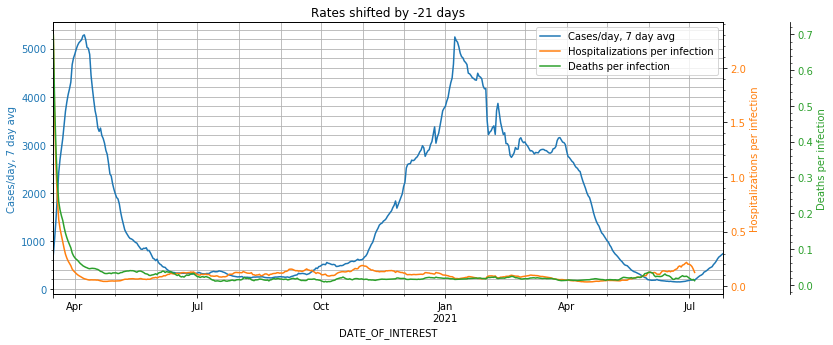

Rates shifted by -20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      478.000000   
mean            1600.013769                        0.118465   
std             1500.688201                        0.144357   
min              145.285714                        0.041091   
25%              324.821429                        0.073242   
50%              816.000000                        0.102759   
75%             2877.535714                        0.126463   
max             5290.285714                        2.324460   

       Deaths per infection  
count            478.000000  
mean               0.027995  
std                0.046548  
min                0.008218  
25%                0.015054  
50%                0.017893  
75%                0.024893  
max                0.648519

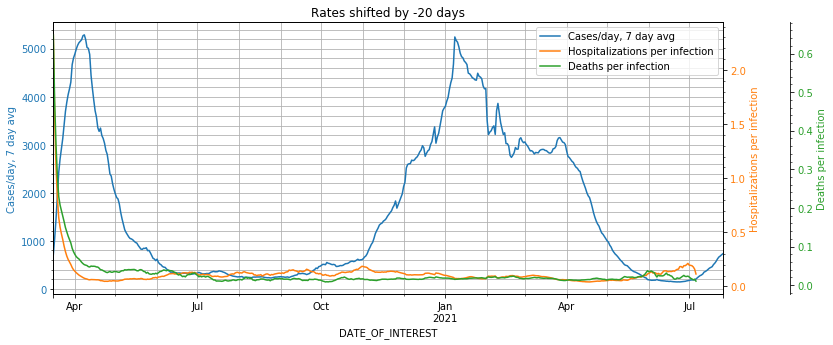

Rates shifted by -19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      479.000000   
mean            1600.013769                        0.119178   
std             1500.688201                        0.146014   
min              145.285714                        0.042368   
25%              324.821429                        0.075129   
50%              816.000000                        0.104108   
75%             2877.535714                        0.125760   
max             5290.285714                        2.343875   

       Deaths per infection  
count            479.000000  
mean               0.028164  
std                0.044041  
min                0.007519  
25%                0.014882  
50%                0.017926  
75%                0.024943  
max                0.590873

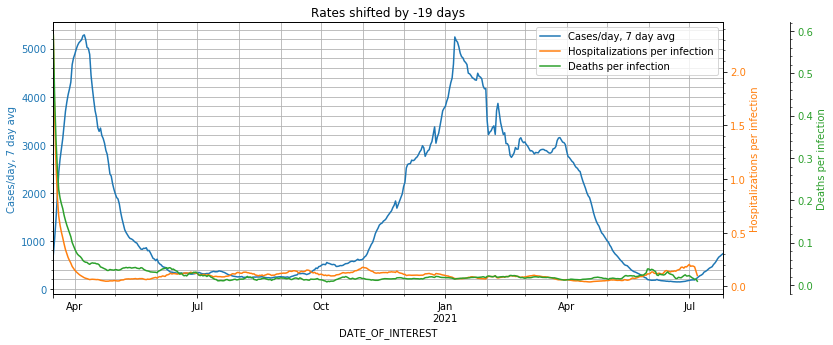

Rates shifted by -18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      480.000000   
mean            1600.013769                        0.119814   
std             1500.688201                        0.146464   
min              145.285714                        0.044096   
25%              324.821429                        0.076664   
50%              816.000000                        0.103059   
75%             2877.535714                        0.124787   
max             5290.285714                        2.331465   

       Deaths per infection  
count            480.000000  
mean               0.028319  
std                0.041620  
min                0.007750  
25%                0.014735  
50%                0.017874  
75%                0.025839  
max                0.543435

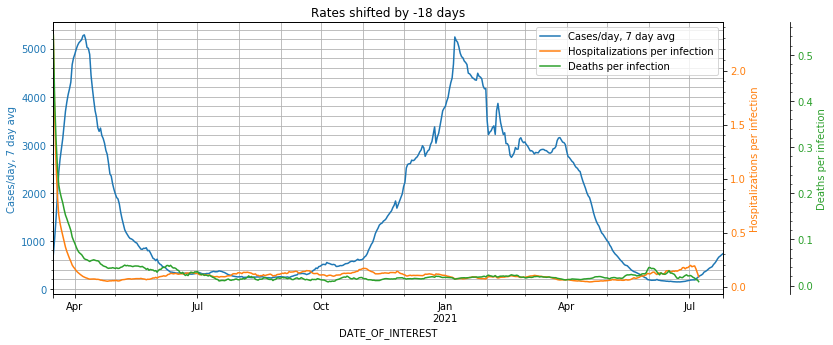

Rates shifted by -17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      481.000000   
mean            1600.013769                        0.120375   
std             1500.688201                        0.145848   
min              145.285714                        0.046345   
25%              324.821429                        0.078694   
50%              816.000000                        0.103216   
75%             2877.535714                        0.123490   
max             5290.285714                        2.302242   

       Deaths per infection  
count            481.000000  
mean               0.028446  
std                0.039042  
min                0.007768  
25%                0.014617  
50%                0.017937  
75%                0.026462  
max                0.487390

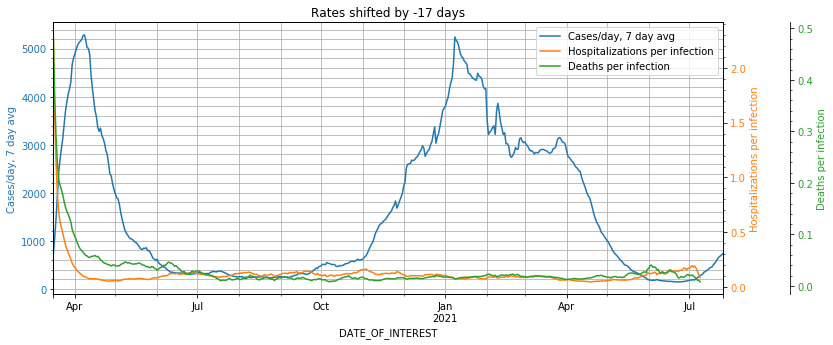

Rates shifted by -16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      482.000000   
mean            1600.013769                        0.120906   
std             1500.688201                        0.144855   
min              145.285714                        0.049029   
25%              324.821429                        0.081089   
50%              816.000000                        0.103139   
75%             2877.535714                        0.123394   
max             5290.285714                        2.277022   

       Deaths per infection  
count            482.000000  
mean               0.028544  
std                0.036305  
min                0.007422  
25%                0.014613  
50%                0.018030  
75%                0.027325  
max                0.425140

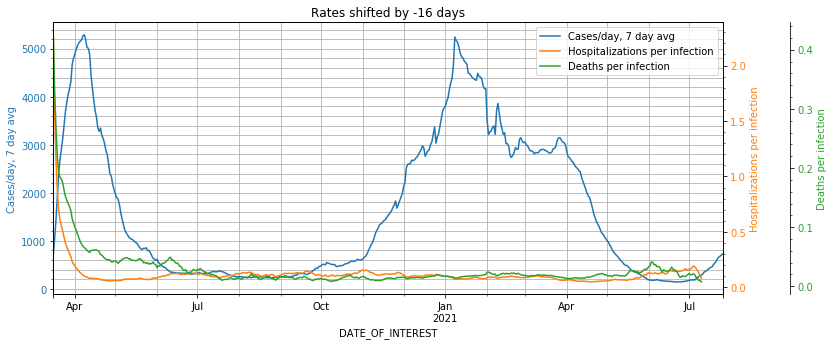

Rates shifted by -15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      483.000000   
mean            1600.013769                        0.121347   
std             1500.688201                        0.142456   
min              145.285714                        0.052159   
25%              324.821429                        0.083264   
50%              816.000000                        0.103226   
75%             2877.535714                        0.122625   
max             5290.285714                        2.212370   

       Deaths per infection  
count            483.000000  
mean               0.028616  
std                0.033538  
min                0.006935  
25%                0.014438  
50%                0.018283  
75%                0.028076  
max                0.360488

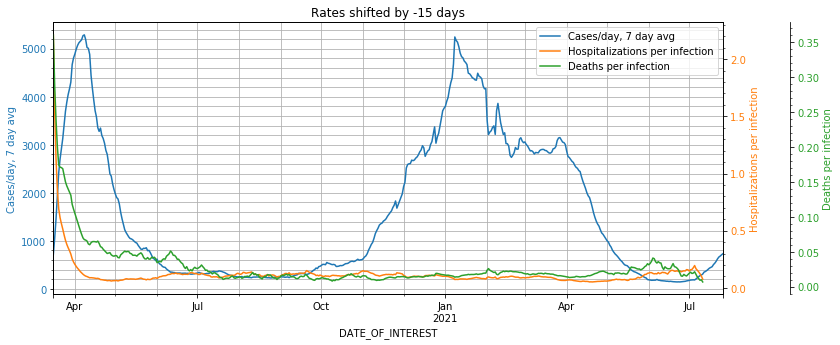

Rates shifted by -14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      484.000000   
mean            1600.013769                        0.121662   
std             1500.688201                        0.138452   
min              145.285714                        0.054950   
25%              324.821429                        0.084720   
50%              816.000000                        0.102312   
75%             2877.535714                        0.122361   
max             5290.285714                        2.115292   

       Deaths per infection  
count            484.000000  
mean               0.028682  
std                0.031015  
min                0.006125  
25%                0.014391  
50%                0.018281  
75%                0.028517  
max                0.302442

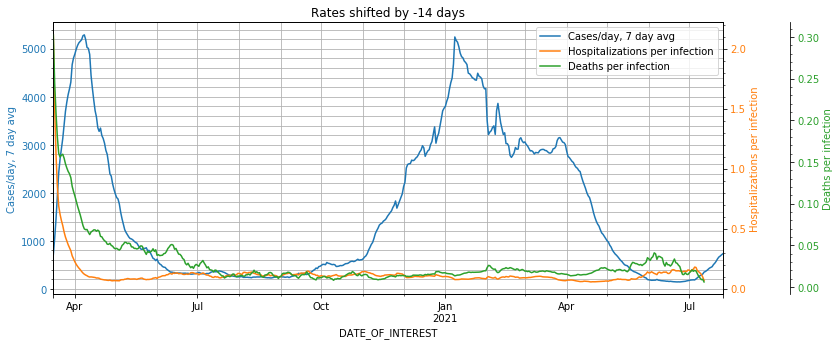

Rates shifted by -13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      485.000000   
mean            1600.013769                        0.121816   
std             1500.688201                        0.132418   
min              145.285714                        0.058458   
25%              324.821429                        0.085396   
50%              816.000000                        0.101789   
75%             2877.535714                        0.121665   
max             5290.285714                        1.974179   

       Deaths per infection  
count            485.000000  
mean               0.028760  
std                0.028915  
min                0.005908  
25%                0.014361  
50%                0.018206  
75%                0.029412  
max                0.253803

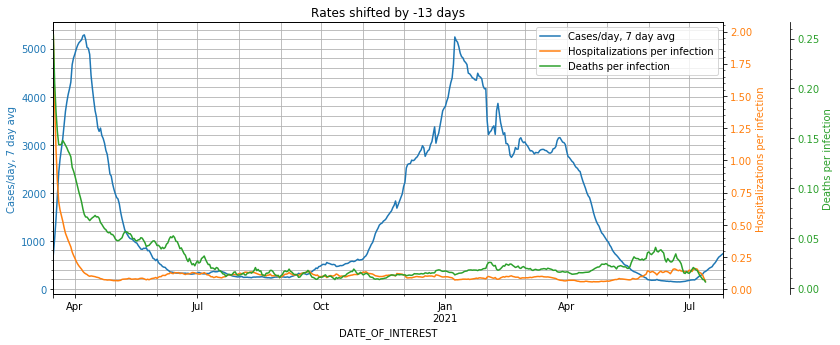

Rates shifted by -12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      486.000000   
mean            1600.013769                        0.121857   
std             1500.688201                        0.125346   
min              145.285714                        0.061619   
25%              324.821429                        0.087440   
50%              816.000000                        0.101980   
75%             2877.535714                        0.121177   
max             5290.285714                        1.828863   

       Deaths per infection  
count            486.000000  
mean               0.028851  
std                0.027185  
min                0.005603  
25%                0.014215  
50%                0.018166  
75%                0.030611  
max                0.205564

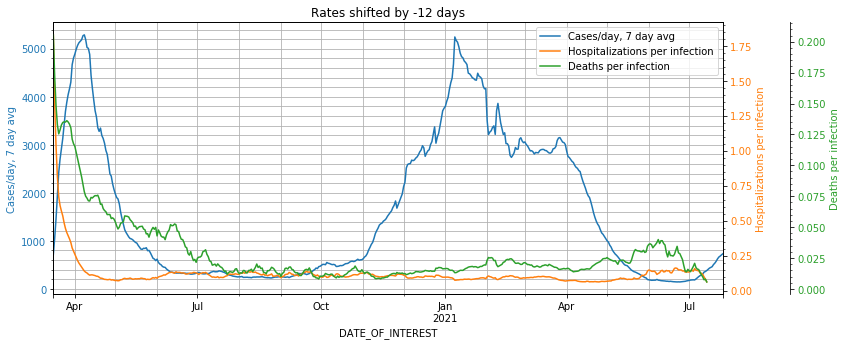

Rates shifted by -11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      487.000000   
mean            1600.013769                        0.121857   
std             1500.688201                        0.118204   
min              145.285714                        0.058225   
25%              324.821429                        0.088903   
50%              816.000000                        0.101232   
75%             2877.535714                        0.120728   
max             5290.285714                        1.698759   

       Deaths per infection  
count            487.000000  
mean               0.028957  
std                0.025852  
min                0.005261  
25%                0.014149  
50%                0.018232  
75%                0.032192  
max                0.159728

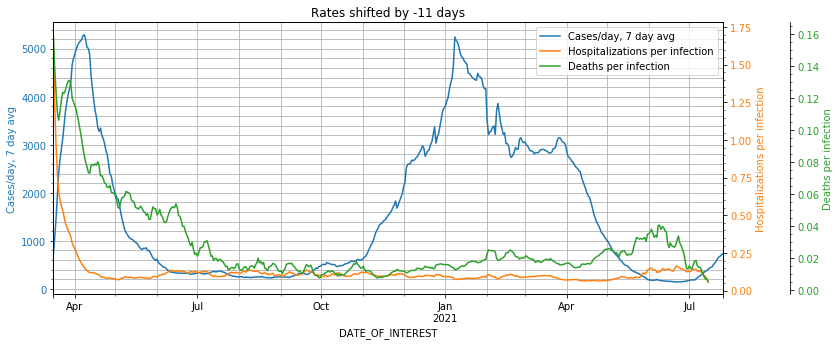

Rates shifted by -10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      488.000000   
mean            1600.013769                        0.121769   
std             1500.688201                        0.110115   
min              145.285714                        0.054822   
25%              324.821429                        0.090730   
50%              816.000000                        0.100324   
75%             2877.535714                        0.121527   
max             5290.285714                        1.534428   

       Deaths per infection  
count            488.000000  
mean               0.029101  
std                0.025009  
min                0.004954  
25%                0.013872  
50%                0.018324  
75%                0.034007  
max                0.127010

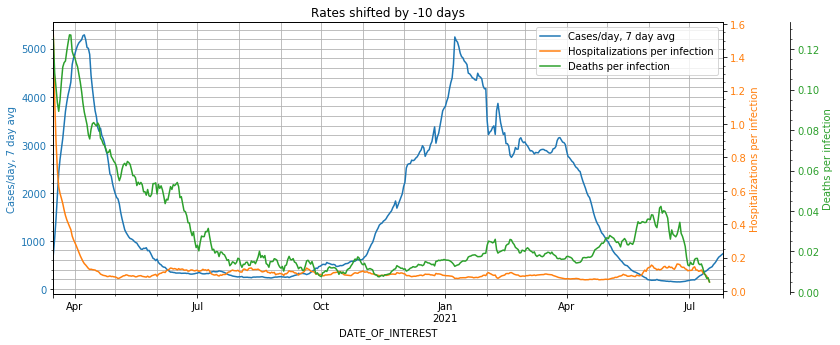

Rates shifted by -9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      489.000000   
mean            1600.013769                        0.121589   
std             1500.688201                        0.101214   
min              145.285714                        0.053052   
25%              324.821429                        0.091011   
50%              816.000000                        0.100036   
75%             2877.535714                        0.121766   
max             5290.285714                        1.352082   

       Deaths per infection  
count            489.000000  
mean               0.029276  
std                0.024571  
min                0.004794  
25%                0.013793  
50%                0.018626  
75%                0.035129  
max                0.122881

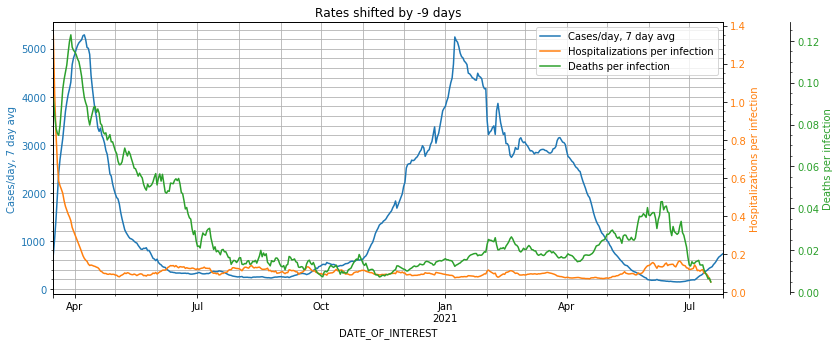

Rates shifted by -8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      490.000000   
mean            1600.013769                        0.121342   
std             1500.688201                        0.092021   
min              145.285714                        0.051203   
25%              324.821429                        0.090881   
50%              816.000000                        0.100801   
75%             2877.535714                        0.122396   
max             5290.285714                        1.167534   

       Deaths per infection  
count            490.000000  
mean               0.029500  
std                0.024529  
min                0.004627  
25%                0.013813  
50%                0.019079  
75%                0.035931  
max                0.115815

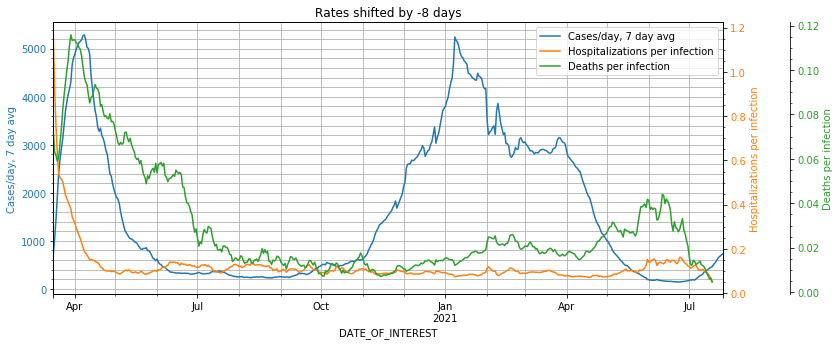

Rates shifted by -7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      491.000000   
mean            1600.013769                        0.121053   
std             1500.688201                        0.082924   
min              145.285714                        0.046761   
25%              324.821429                        0.090351   
50%              816.000000                        0.101898   
75%             2877.535714                        0.122075   
max             5290.285714                        0.982786   

       Deaths per infection  
count            491.000000  
mean               0.029776  
std                0.024803  
min                0.004225  
25%                0.013551  
50%                0.019327  
75%                0.036706  
max                0.111721

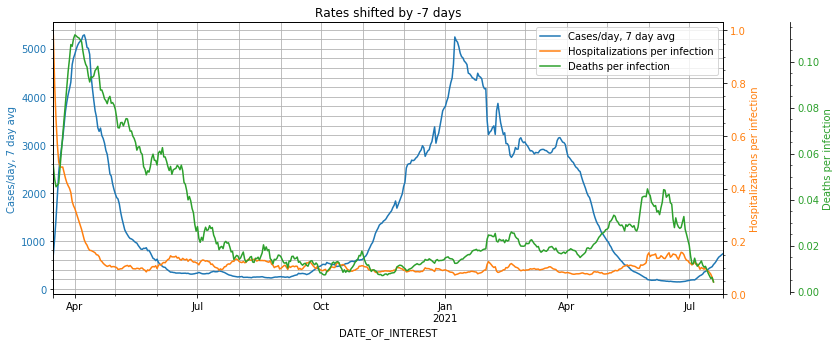

Rates shifted by -6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      492.000000   
mean            1600.013769                        0.120779   
std             1500.688201                        0.074696   
min              145.285714                        0.044161   
25%              324.821429                        0.089256   
50%              816.000000                        0.102478   
75%             2877.535714                        0.122882   
max             5290.285714                        0.821857   

       Deaths per infection  
count            492.000000  
mean               0.030100  
std                0.025338  
min                0.003990  
25%                0.013146  
50%                0.019489  
75%                0.036086  
max                0.109704

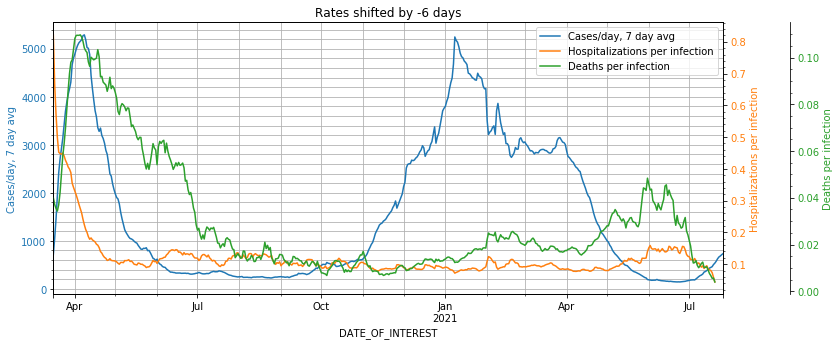

Rates shifted by -5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      493.000000   
mean            1600.013769                        0.120628   
std             1500.688201                        0.068162   
min              145.285714                        0.041140   
25%              324.821429                        0.088534   
50%              816.000000                        0.102813   
75%             2877.535714                        0.124667   
max             5290.285714                        0.710168   

       Deaths per infection  
count            493.000000  
mean               0.030477  
std                0.026080  
min                0.003717  
25%                0.013095  
50%                0.019932  
75%                0.035669  
max                0.109031

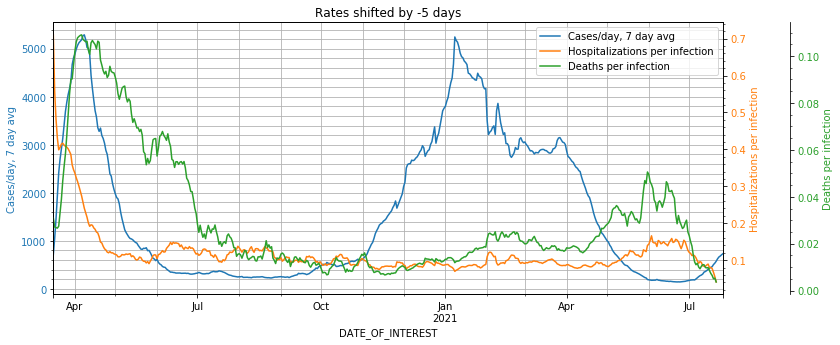

Rates shifted by -4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      494.000000   
mean            1600.013769                        0.120562   
std             1500.688201                        0.062757   
min              145.285714                        0.037882   
25%              324.821429                        0.088837   
50%              816.000000                        0.102454   
75%             2877.535714                        0.127091   
max             5290.285714                        0.597078   

       Deaths per infection  
count            494.000000  
mean               0.030899  
std                0.026995  
min                0.003423  
25%                0.012875  
50%                0.020215  
75%                0.036753  
max                0.113205

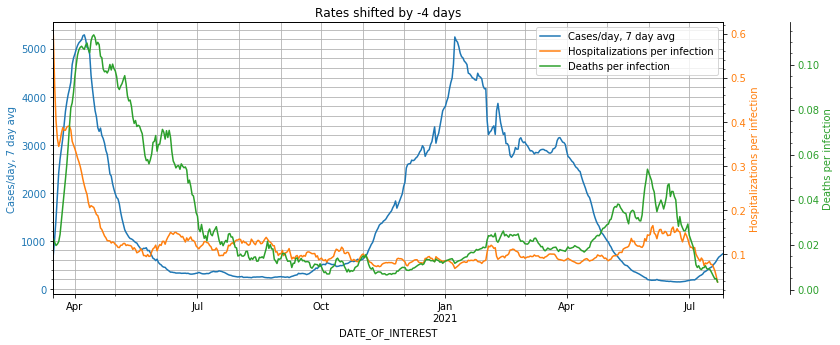

Rates shifted by -3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      495.000000   
mean            1600.013769                        0.120549   
std             1500.688201                        0.058294   
min              145.285714                        0.035714   
25%              324.821429                        0.088649   
50%              816.000000                        0.102520   
75%             2877.535714                        0.129836   
max             5290.285714                        0.478383   

       Deaths per infection  
count            495.000000  
mean               0.031361  
std                0.028067  
min                0.003227  
25%                0.012775  
50%                0.019975  
75%                0.037973  
max                0.119922

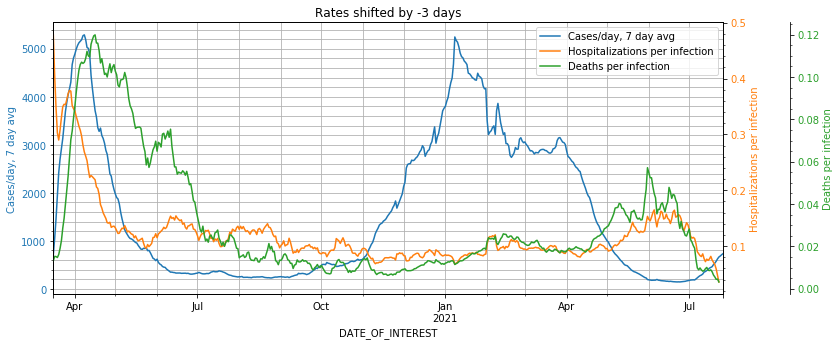

Rates shifted by -2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      496.000000   
mean            1600.013769                        0.120622   
std             1500.688201                        0.055066   
min              145.285714                        0.034634   
25%              324.821429                        0.088351   
50%              816.000000                        0.104438   
75%             2877.535714                        0.132909   
max             5290.285714                        0.373899   

       Deaths per infection  
count            496.000000  
mean               0.031867  
std                0.029268  
min                0.003130  
25%                0.012316  
50%                0.020423  
75%                0.038964  
max                0.126539

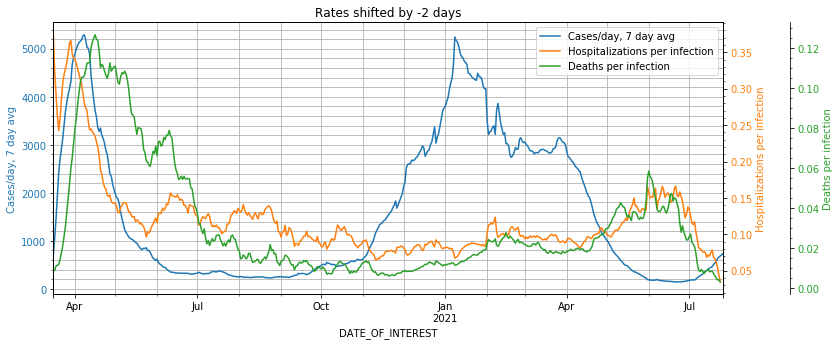

Rates shifted by -1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      497.000000   
mean            1600.013769                        0.120813   
std             1500.688201                        0.053214   
min              145.285714                        0.033374   
25%              324.821429                        0.087556   
50%              816.000000                        0.105663   
75%             2877.535714                        0.136704   
max             5290.285714                        0.350595   

       Deaths per infection  
count            497.000000  
mean               0.032421  
std                0.030590  
min                0.003016  
25%                0.012022  
50%                0.020398  
75%                0.039801  
max                0.132610

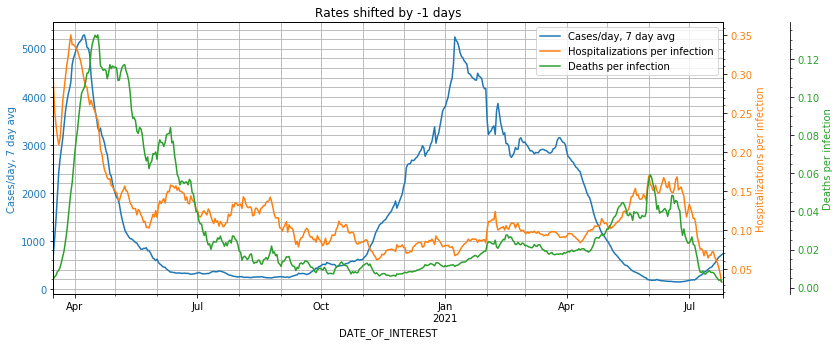

Rates shifted by 0 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.121145   
std             1500.688201                        0.052668   
min              145.285714                        0.032365   
25%              324.821429                        0.087445   
50%              816.000000                        0.108063   
75%             2877.535714                        0.138858   
max             5290.285714                        0.332272   

       Deaths per infection  
count            498.000000  
mean               0.033015  
std                0.032009  
min                0.002925  
25%                0.011638  
50%                0.021030  
75%                0.040761  
max                0.139928

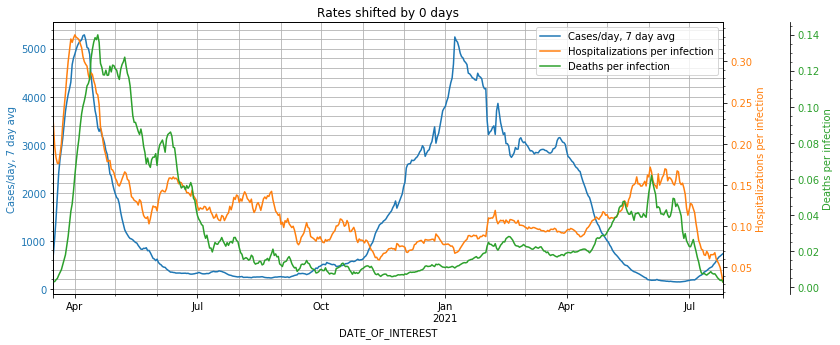

Rates shifted by 1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.121810   
std             1500.688201                        0.053163   
min              145.285714                        0.040554   
25%              324.821429                        0.088081   
50%              816.000000                        0.109710   
75%             2877.535714                        0.140414   
max             5290.285714                        0.325587   

       Deaths per infection  
count            498.000000  
mean               0.033713  
std                0.033524  
min                0.001401  
25%                0.011374  
50%                0.021195  
75%                0.042822  
max                0.146394

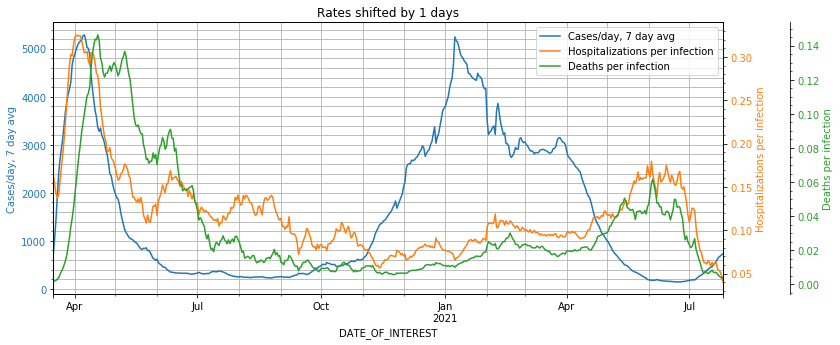

Rates shifted by 2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.122620   
std             1500.688201                        0.054604   
min              145.285714                        0.046403   
25%              324.821429                        0.087547   
50%              816.000000                        0.110981   
75%             2877.535714                        0.140834   
max             5290.285714                        0.324896   

       Deaths per infection  
count            498.000000  
mean               0.034451  
std                0.035133  
min                0.000600  
25%                0.010974  
50%                0.021321  
75%                0.044453  
max                0.152989

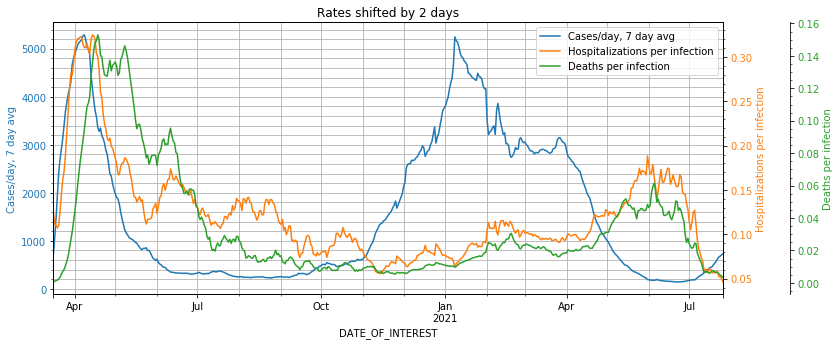

Rates shifted by 3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.123567   
std             1500.688201                        0.056768   
min              145.285714                        0.048937   
25%              324.821429                        0.086897   
50%              816.000000                        0.110962   
75%             2877.535714                        0.143256   
max             5290.285714                        0.344955   

       Deaths per infection  
count            498.000000  
mean               0.035233  
std                0.036826  
min                0.000200  
25%                0.010755  
50%                0.021320  
75%                0.045110  
max                0.159200

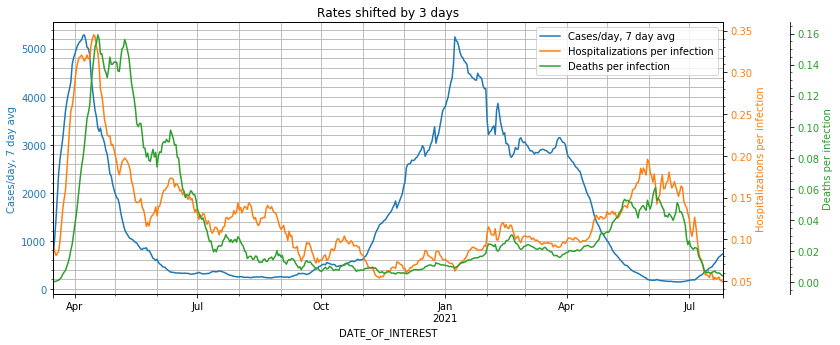

Rates shifted by 4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.124659   
std             1500.688201                        0.059536   
min              145.285714                        0.048380   
25%              324.821429                        0.085672   
50%              816.000000                        0.110896   
75%             2877.535714                        0.145918   
max             5290.285714                        0.365420   

       Deaths per infection  
count            498.000000  
mean               0.036054  
std                0.038595  
min                0.000136  
25%                0.010572  
50%                0.021328  
75%                0.045750  
max                0.165237

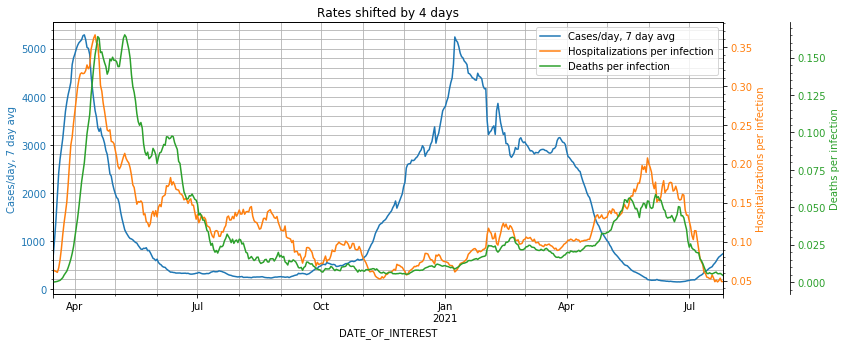

Rates shifted by 5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.125909   
std             1500.688201                        0.062777   
min              145.285714                        0.043095   
25%              324.821429                        0.084209   
50%              816.000000                        0.110367   
75%             2877.535714                        0.150288   
max             5290.285714                        0.382733   

       Deaths per infection  
count            498.000000  
mean               0.036920  
std                0.040457  
min                0.000098  
25%                0.010450  
50%                0.021429  
75%                0.047675  
max                0.178108

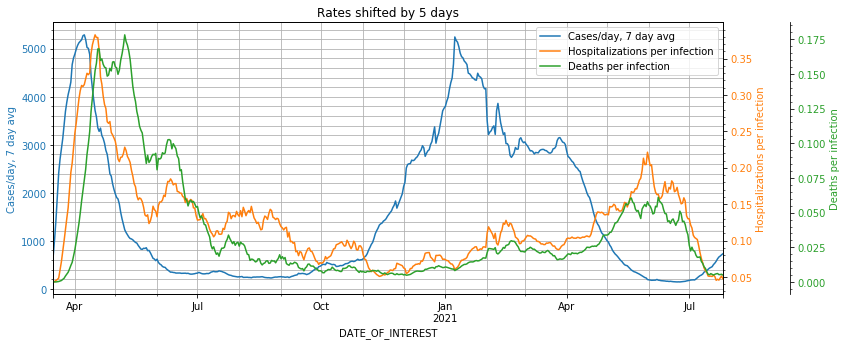

Rates shifted by 6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.127316   
std             1500.688201                        0.066409   
min              145.285714                        0.029223   
25%              324.821429                        0.082191   
50%              816.000000                        0.110414   
75%             2877.535714                        0.153832   
max             5290.285714                        0.404084   

       Deaths per infection  
count            498.000000  
mean               0.037825  
std                0.042400  
min                0.000000  
25%                0.010387  
50%                0.021653  
75%                0.048842  
max                0.186793

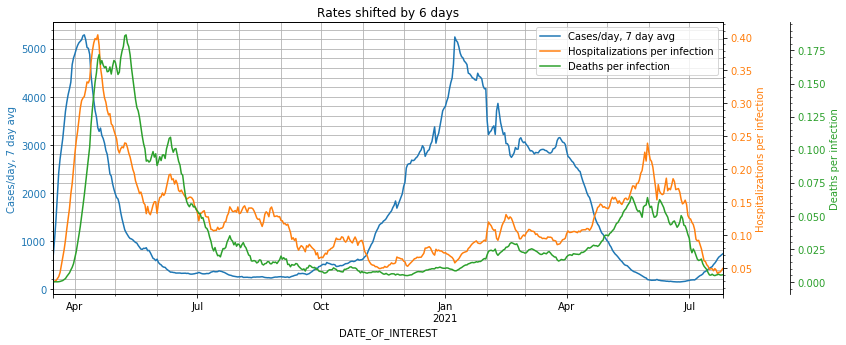

Rates shifted by 7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.128865   
std             1500.688201                        0.070352   
min              145.285714                        0.019015   
25%              324.821429                        0.080744   
50%              816.000000                        0.112548   
75%             2877.535714                        0.158284   
max             5290.285714                        0.423229   

       Deaths per infection  
count            498.000000  
mean               0.038772  
std                0.044426  
min                0.000000  
25%                0.010183  
50%                0.021760  
75%                0.049055  
max                0.195063

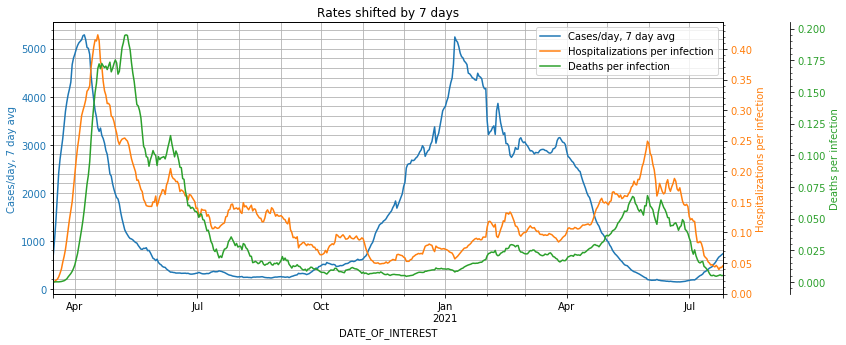

Rates shifted by 8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.130564   
std             1500.688201                        0.074571   
min              145.285714                        0.011809   
25%              324.821429                        0.078985   
50%              816.000000                        0.115249   
75%             2877.535714                        0.161680   
max             5290.285714                        0.440672   

       Deaths per infection  
count            498.000000  
mean               0.039758  
std                0.046528  
min                0.000000  
25%                0.009914  
50%                0.021955  
75%                0.049289  
max                0.206633

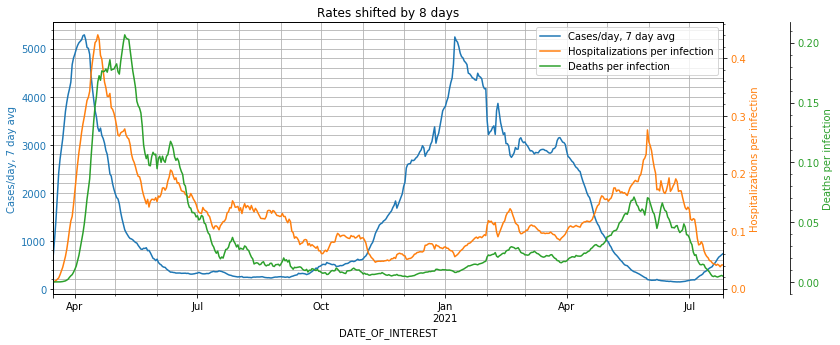

Rates shifted by 9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.132412   
std             1500.688201                        0.079020   
min              145.285714                        0.007996   
25%              324.821429                        0.078480   
50%              816.000000                        0.115126   
75%             2877.535714                        0.166474   
max             5290.285714                        0.458881   

       Deaths per infection  
count            498.000000  
mean               0.040780  
std                0.048703  
min                0.000000  
25%                0.009747  
50%                0.022084  
75%                0.050064  
max                0.218924

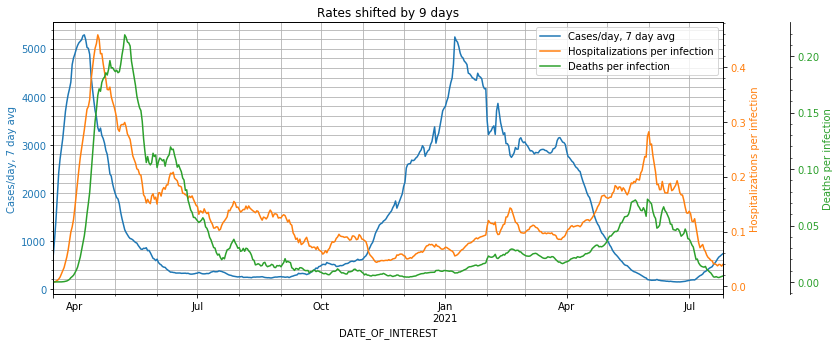

Rates shifted by 10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.134402   
std             1500.688201                        0.083698   
min              145.285714                        0.005692   
25%              324.821429                        0.078662   
50%              816.000000                        0.115186   
75%             2877.535714                        0.170085   
max             5290.285714                        0.472368   

       Deaths per infection  
count            498.000000  
mean               0.041839  
std                0.050959  
min                0.000000  
25%                0.009668  
50%                0.022084  
75%                0.051579  
max                0.229600

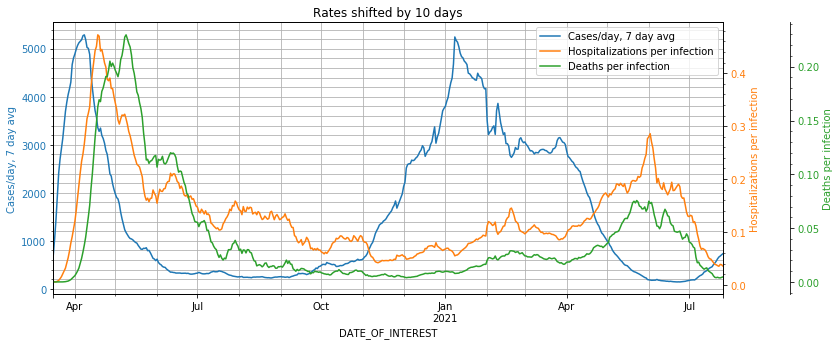

Rates shifted by 11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.136535   
std             1500.688201                        0.088609   
min              145.285714                        0.004120   
25%              324.821429                        0.076645   
50%              816.000000                        0.116768   
75%             2877.535714                        0.177302   
max             5290.285714                        0.483559   

       Deaths per infection  
count            498.000000  
mean               0.042937  
std                0.053315  
min                0.000000  
25%                0.009330  
50%                0.022225  
75%                0.052783  
max                0.239199

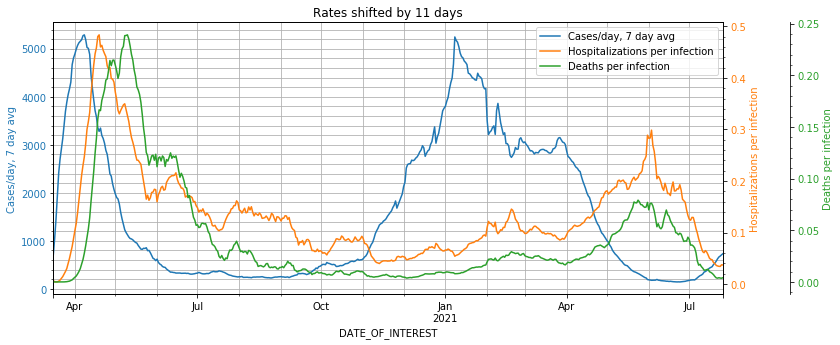

Rates shifted by 12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.138790   
std             1500.688201                        0.093768   
min              145.285714                        0.003100   
25%              324.821429                        0.076205   
50%              816.000000                        0.115899   
75%             2877.535714                        0.181770   
max             5290.285714                        0.491660   

       Deaths per infection  
count            498.000000  
mean               0.044074  
std                0.055758  
min                0.000000  
25%                0.009035  
50%                0.022334  
75%                0.053691  
max                0.250030

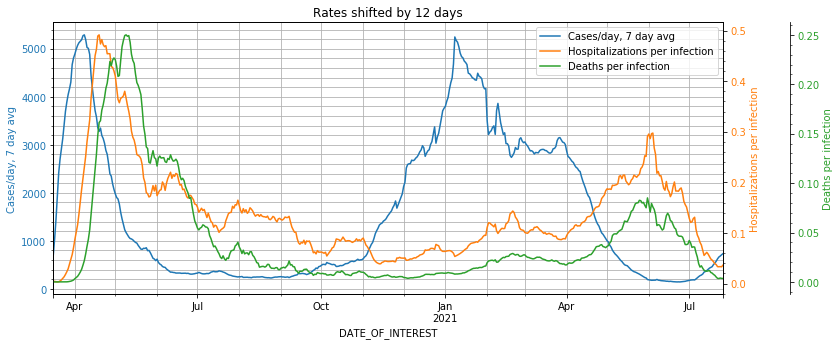

Rates shifted by 13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.141175   
std             1500.688201                        0.099159   
min              145.285714                        0.002466   
25%              324.821429                        0.074122   
50%              816.000000                        0.117016   
75%             2877.535714                        0.184784   
max             5290.285714                        0.500936   

       Deaths per infection  
count            498.000000  
mean               0.045247  
std                0.058293  
min                0.000000  
25%                0.008814  
50%                0.022642  
75%                0.054591  
max                0.267161

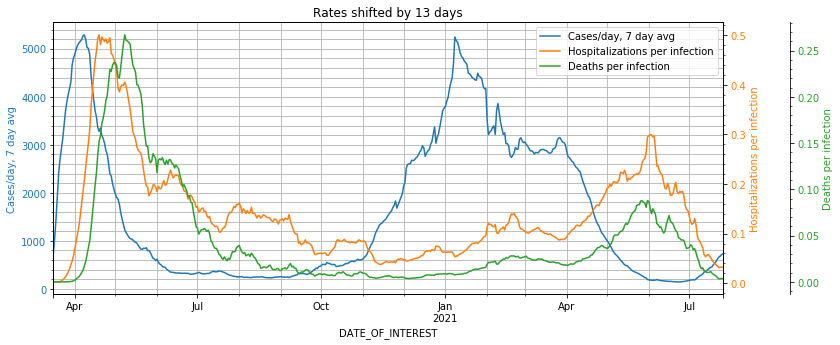

Rates shifted by 14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.143703   
std             1500.688201                        0.104825   
min              145.285714                        0.001785   
25%              324.821429                        0.072586   
50%              816.000000                        0.117203   
75%             2877.535714                        0.185835   
max             5290.285714                        0.531270   

       Deaths per infection  
count            498.000000  
mean               0.046455  
std                0.060918  
min                0.000000  
25%                0.008591  
50%                0.022916  
75%                0.055890  
max                0.281772

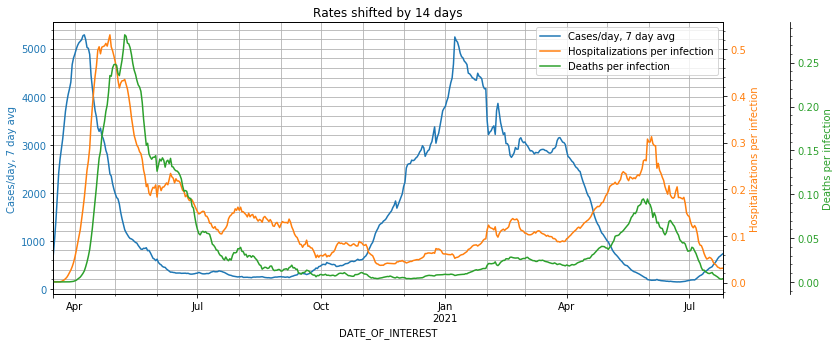

Rates shifted by 15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.146359   
std             1500.688201                        0.110746   
min              145.285714                        0.001265   
25%              324.821429                        0.070339   
50%              816.000000                        0.117822   
75%             2877.535714                        0.192456   
max             5290.285714                        0.566267   

       Deaths per infection  
count            498.000000  
mean               0.047702  
std                0.063648  
min                0.000000  
25%                0.008464  
50%                0.023069  
75%                0.056149  
max                0.295513

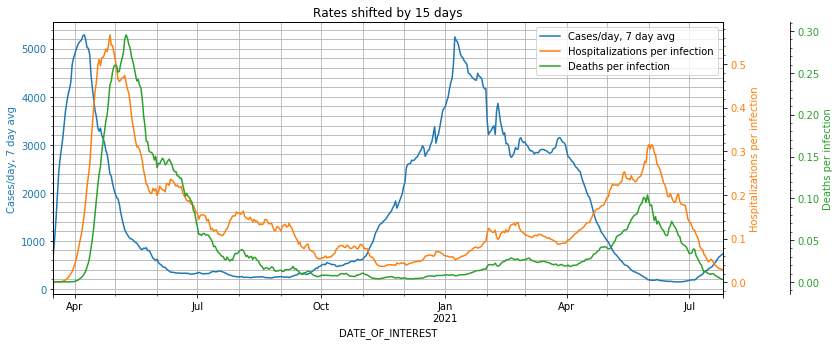

Rates shifted by 16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      498.000000   
mean            1600.013769                        0.149168   
std             1500.688201                        0.116993   
min              145.285714                        0.000915   
25%              324.821429                        0.068652   
50%              816.000000                        0.119403   
75%             2877.535714                        0.194597   
max             5290.285714                        0.593096   

       Deaths per infection  
count            498.000000  
mean               0.048994  
std                0.066498  
min                0.000000  
25%                0.008303  
50%                0.023418  
75%                0.057807  
max                0.307868

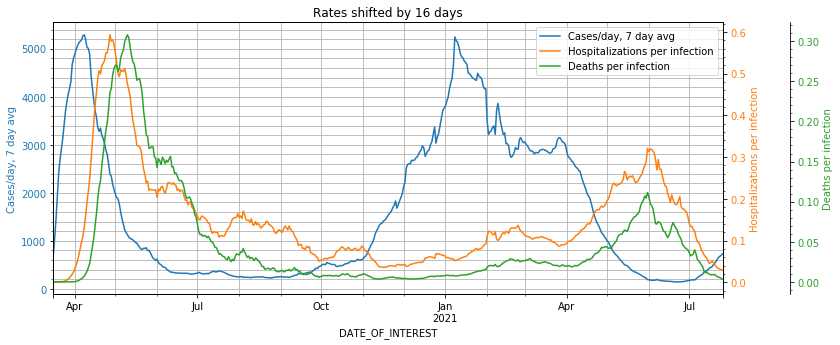

Rates shifted by 17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      497.000000   
mean            1600.013769                        0.152420   
std             1500.688201                        0.123488   
min              145.285714                        0.000687   
25%              324.821429                        0.065888   
50%              816.000000                        0.119681   
75%             2877.535714                        0.197772   
max             5290.285714                        0.619610   

       Deaths per infection  
count            497.000000  
mean               0.050430  
std                0.069501  
min                0.000000  
25%                0.008259  
50%                0.023338  
75%                0.058133  
max                0.320834

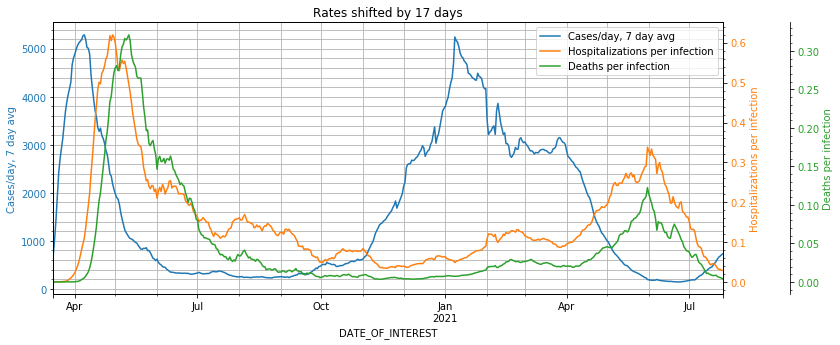

Rates shifted by 18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      496.000000   
mean            1600.013769                        0.155820   
std             1500.688201                        0.130301   
min              145.285714                        0.000517   
25%              324.821429                        0.064150   
50%              816.000000                        0.118967   
75%             2877.535714                        0.199579   
max             5290.285714                        0.654583   

       Deaths per infection  
count            496.000000  
mean               0.051909  
std                0.072616  
min                0.000000  
25%                0.008118  
50%                0.023304  
75%                0.059188  
max                0.337430

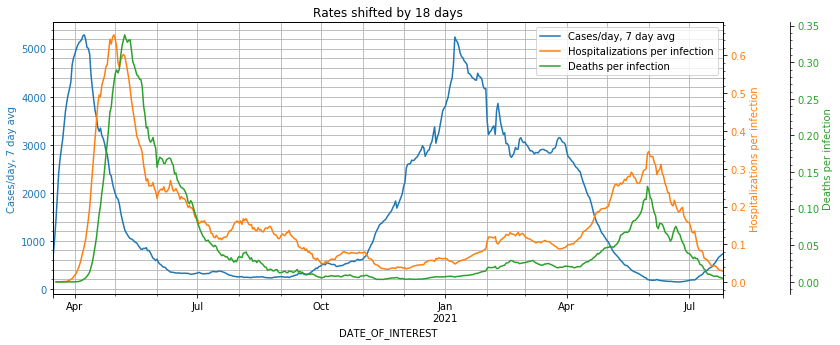

Rates shifted by 19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      495.000000   
mean            1600.013769                        0.159378   
std             1500.688201                        0.137466   
min              145.285714                        0.000413   
25%              324.821429                        0.064494   
50%              816.000000                        0.119547   
75%             2877.535714                        0.205300   
max             5290.285714                        0.685596   

       Deaths per infection  
count            495.000000  
mean               0.053435  
std                0.075852  
min                0.000000  
25%                0.008064  
50%                0.023381  
75%                0.059911  
max                0.361433

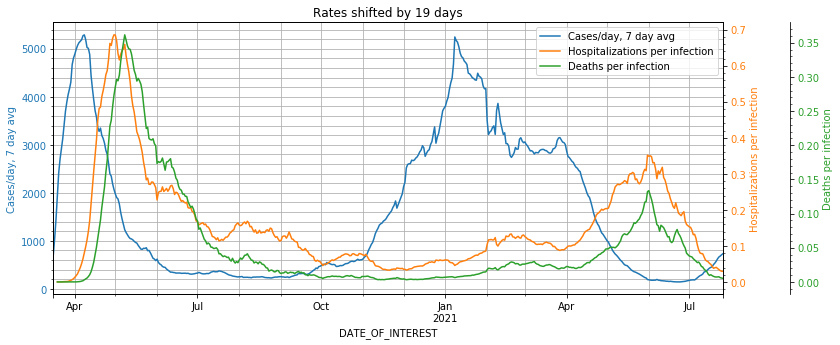

Rates shifted by 20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      494.000000   
mean            1600.013769                        0.163092   
std             1500.688201                        0.144995   
min              145.285714                        0.000370   
25%              324.821429                        0.064715   
50%              816.000000                        0.119939   
75%             2877.535714                        0.212018   
max             5290.285714                        0.717645   

       Deaths per infection  
count            494.000000  
mean               0.055011  
std                0.079214  
min                0.000000  
25%                0.007932  
50%                0.023768  
75%                0.061091  
max                0.381378

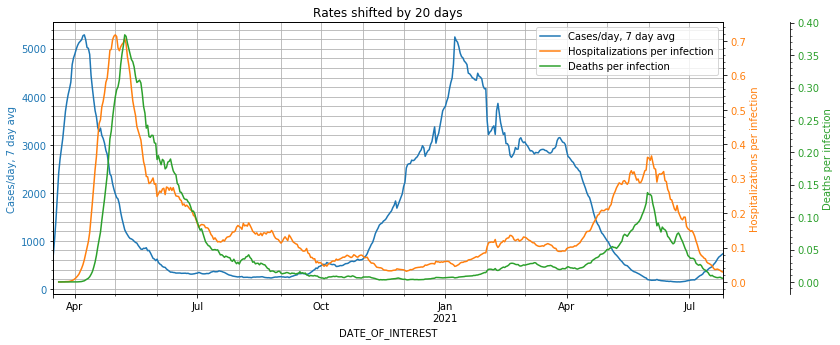

Rates shifted by 21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      493.000000   
mean            1600.013769                        0.166963   
std             1500.688201                        0.152907   
min              145.285714                        0.000342   
25%              324.821429                        0.064207   
50%              816.000000                        0.120166   
75%             2877.535714                        0.218512   
max             5290.285714                        0.759856   

       Deaths per infection  
count            493.000000  
mean               0.056639  
std                0.082696  
min                0.000000  
25%                0.007981  
50%                0.023848  
75%                0.061625  
max                0.399976

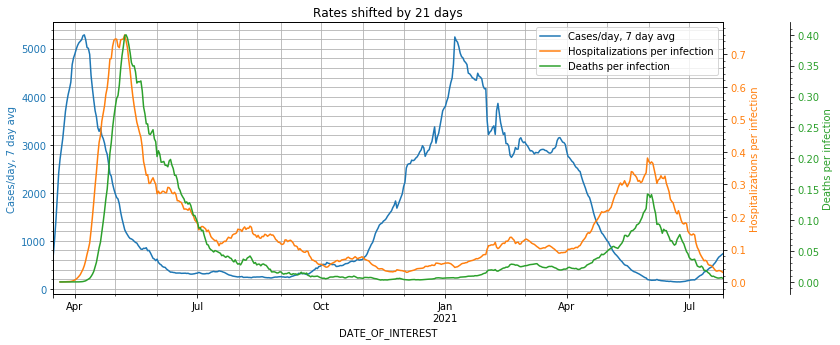

Rates shifted by 22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      492.000000   
mean            1600.013769                        0.171007   
std             1500.688201                        0.161252   
min              145.285714                        0.000319   
25%              324.821429                        0.063431   
50%              816.000000                        0.121378   
75%             2877.535714                        0.223144   
max             5290.285714                        0.817254   

       Deaths per infection  
count            492.000000  
mean               0.058311  
std                0.086288  
min                0.000000  
25%                0.007923  
50%                0.023993  
75%                0.062924  
max                0.418460

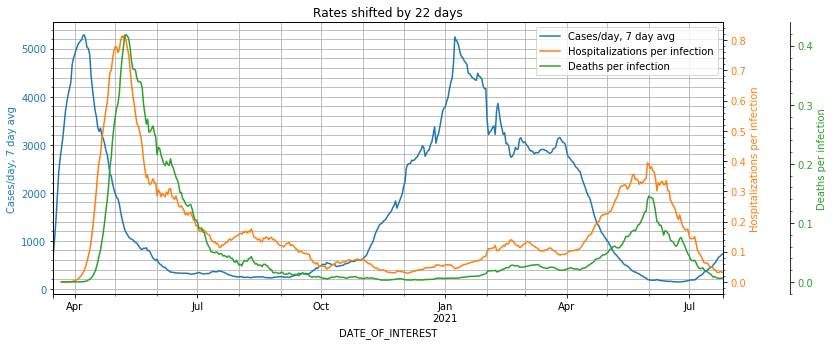

Rates shifted by 23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      491.000000   
mean            1600.013769                        0.175197   
std             1500.688201                        0.169987   
min              145.285714                        0.000292   
25%              324.821429                        0.061712   
50%              816.000000                        0.120246   
75%             2877.535714                        0.230949   
max             5290.285714                        0.883465   

       Deaths per infection  
count            491.000000  
mean               0.060024  
std                0.089975  
min                0.000000  
25%                0.007923  
50%                0.024335  
75%                0.063734  
max                0.437310

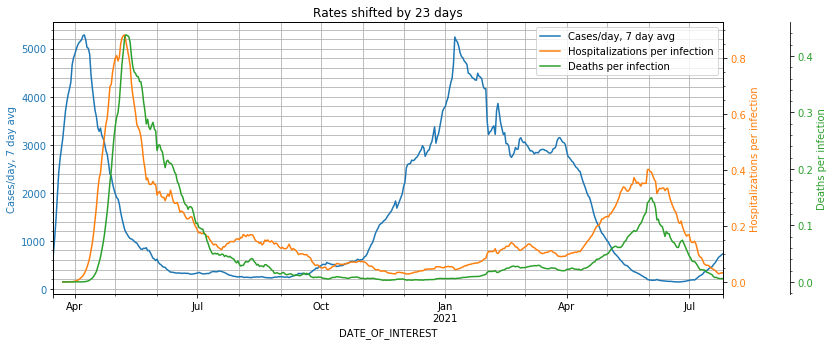

Rates shifted by 24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      490.000000   
mean            1600.013769                        0.179554   
std             1500.688201                        0.179134   
min              145.285714                        0.000271   
25%              324.821429                        0.061069   
50%              816.000000                        0.121157   
75%             2877.535714                        0.234144   
max             5290.285714                        0.963242   

       Deaths per infection  
count            490.000000  
mean               0.061785  
std                0.093753  
min                0.000000  
25%                0.007841  
50%                0.024291  
75%                0.065743  
max                0.455594

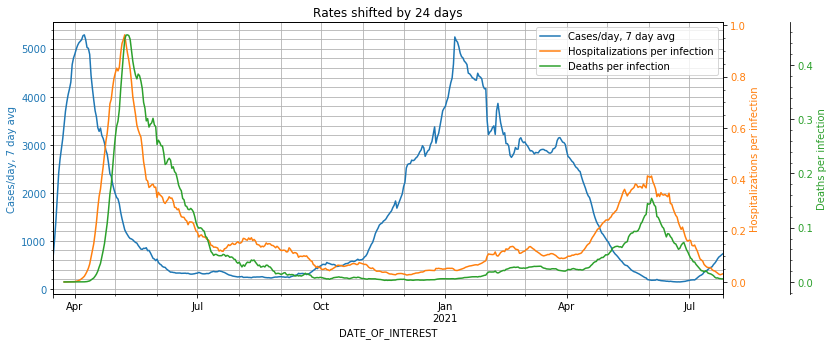

Rates shifted by 25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      489.000000   
mean            1600.013769                        0.184080   
std             1500.688201                        0.188688   
min              145.285714                        0.000257   
25%              324.821429                        0.060138   
50%              816.000000                        0.123139   
75%             2877.535714                        0.239838   
max             5290.285714                        1.033279   

       Deaths per infection  
count            489.000000  
mean               0.063591  
std                0.097615  
min                0.000000  
25%                0.007628  
50%                0.024320  
75%                0.068247  
max                0.474782

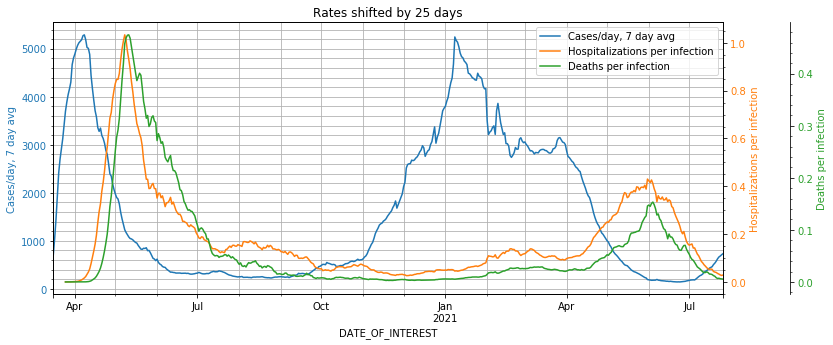

Rates shifted by 26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      488.000000   
mean            1600.013769                        0.188779   
std             1500.688201                        0.198612   
min              145.285714                        0.000247   
25%              324.821429                        0.060199   
50%              816.000000                        0.123870   
75%             2877.535714                        0.245805   
max             5290.285714                        1.101345   

       Deaths per infection  
count            488.000000  
mean               0.065439  
std                0.101549  
min                0.000000  
25%                0.007511  
50%                0.024828  
75%                0.070101  
max                0.494059

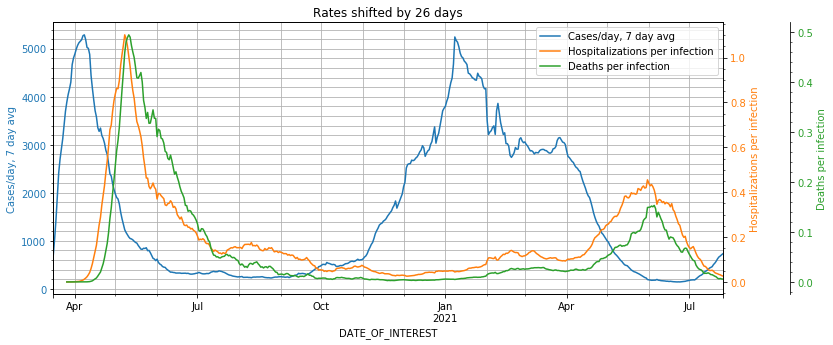

Rates shifted by 27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      487.000000   
mean            1600.013769                        0.193657   
std             1500.688201                        0.208891   
min              145.285714                        0.000240   
25%              324.821429                        0.058733   
50%              816.000000                        0.124638   
75%             2877.535714                        0.249481   
max             5290.285714                        1.155053   

       Deaths per infection  
count            487.000000  
mean               0.067325  
std                0.105537  
min                0.000000  
25%                0.007469  
50%                0.025091  
75%                0.072232  
max                0.509324

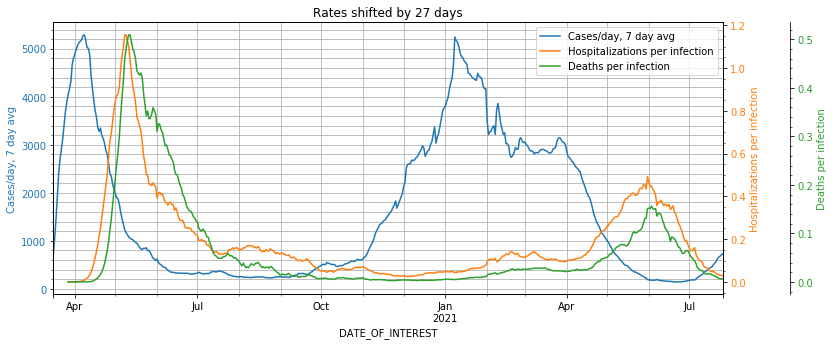

Rates shifted by 28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      486.000000   
mean            1600.013769                        0.198692   
std             1500.688201                        0.219458   
min              145.285714                        0.000232   
25%              324.821429                        0.057343   
50%              816.000000                        0.123945   
75%             2877.535714                        0.255798   
max             5290.285714                        1.209777   

       Deaths per infection  
count            486.000000  
mean               0.069252  
std                0.109611  
min                0.000000  
25%                0.007294  
50%                0.025348  
75%                0.074710  
max                0.524840

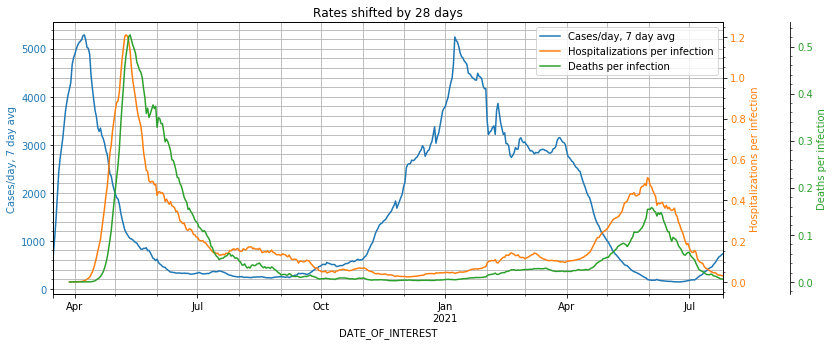

Rates shifted by 29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            498.000000                      485.000000   
mean            1600.013769                        0.203884   
std             1500.688201                        0.230325   
min              145.285714                        0.000214   
25%              324.821429                        0.056615   
50%              816.000000                        0.126909   
75%             2877.535714                        0.260175   
max             5290.285714                        1.260357   

       Deaths per infection  
count            485.000000  
mean               0.071221  
std                0.113763  
min                0.000000  
25%                0.007297  
50%                0.025375  
75%                0.075598  
max                0.537226

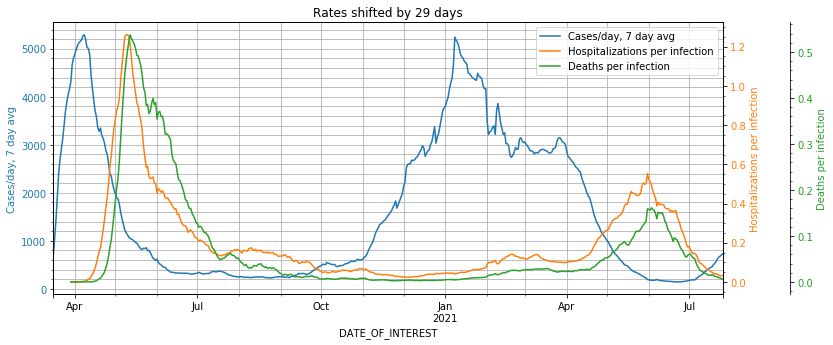

In [19]:
start = "2020/03/15"

statresults = pd.DataFrame(columns=["shift", "h/i mean", "h/i std", "d/i mean", "d/i std"])

for shift in range(-30, 30):
    dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    period = dat[dat.index > start]
    u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))
    print(f"Rates shifted by {shift} days")
    stats = period[["Cases/day, 7 day avg",
                    "Hospitalizations per infection",
                    "Deaths per infection"]].describe()
    display(stats)
    plt.title(f"Rates shifted by {shift} days")
    plt.show()

# Shift analysis
Find which shifts give the min std.  That should be the right shift.

In [20]:
columns = ["Hospitalized/day, 7 day avg", "Deaths/day, 7 day avg"]
denom = "Cases/day, 7 day avg"

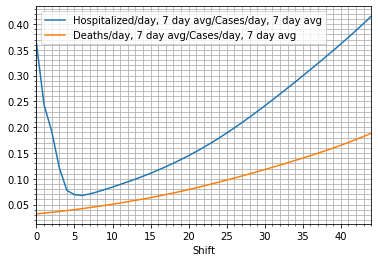

In [21]:
stddevs = u.calc_rate_std(dat, 0, 45, columns, denom)
stddevs.plot()

/home/hjstein/Repos/coronavirus-data/Notebooks/utilities.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[newcol] = dat[col].shift(shift)/dat[denom]


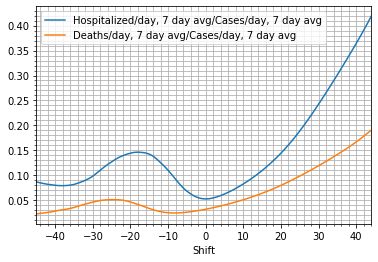

In [22]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

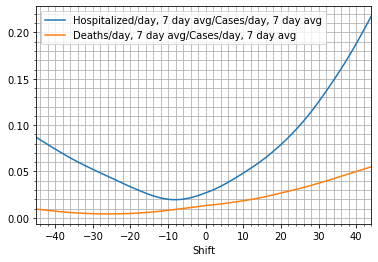

In [23]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

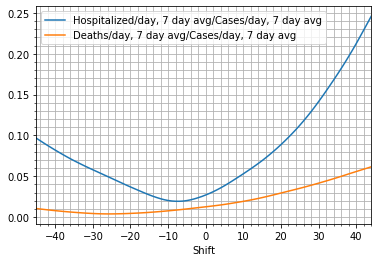

In [24]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

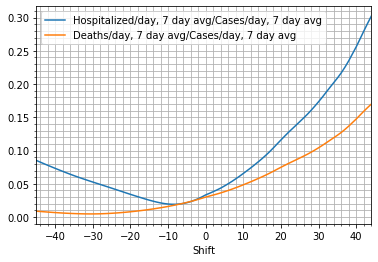

In [25]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

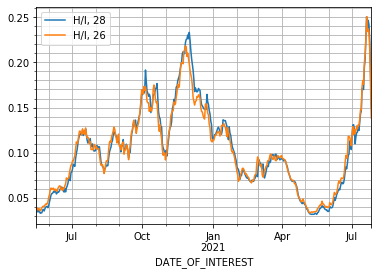

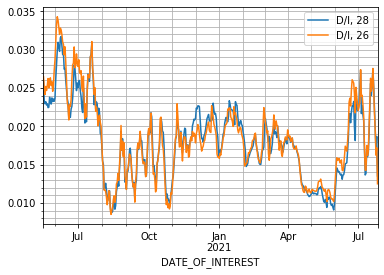

In [26]:
hcol = []
dcol = []
for shift in [28, 26]:
    hcol.append(f"H/I, {shift}")
    dcol.append(f"D/I, {shift}")
    dat[hcol[-1]] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)
    dat[dcol[-1]] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)

start = "2020/05/15"
period = dat[dat.index > start]
period[hcol].plot()
plt.show()
period[dcol].plot()

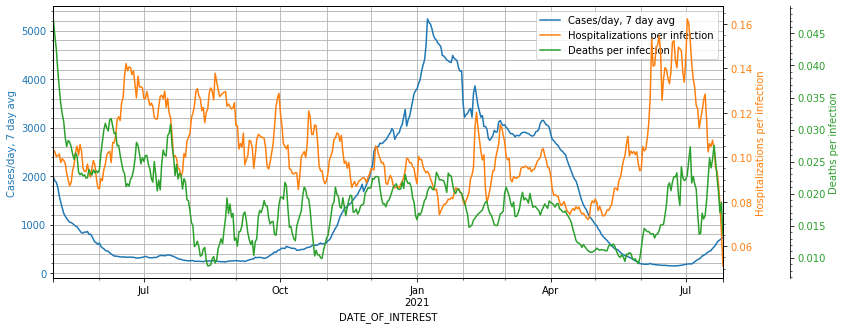

In [27]:
shift = 8
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)

shift = 28
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)
start = "2020/04/30"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

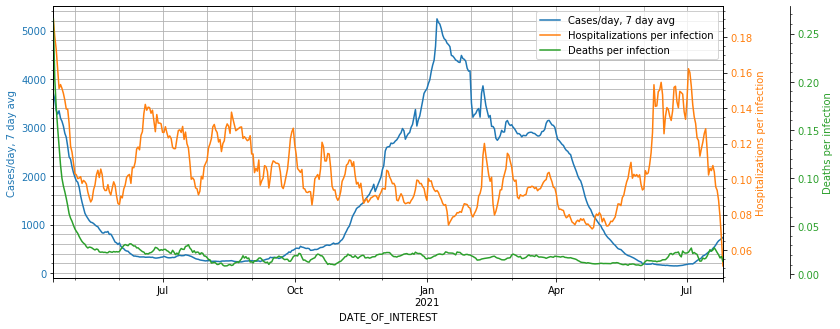

In [28]:
start = "2020/04/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))